# Plot Koppen-Geiger Maps

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors as colors

### Load Kopen-Geiger Shapefile

In [3]:
gdf_koppen = gpd.read_file('koppen_geiger_vector.shp')

In [6]:
# Inspect file
gdf_koppen

,Climate_Zo,Climate_Na,Legend_Col,geometry
0,31,ET,blue,"POLYGON ((-37.00000 83.75000, -36.75000 83.750..."
1,30,EF,steelblue,"POLYGON ((-32.41667 83.58333, -31.75000 83.583..."
2,30,EF,steelblue,"POLYGON ((-31.16667 83.50000, -30.91667 83.500..."
3,30,EF,steelblue,"POLYGON ((-40.58333 83.33333, -40.33333 83.333..."
4,31,ET,blue,"POLYGON ((-42.33333 83.50000, -42.25000 83.500..."
...,...,...,...,...
25138,32,Ocean,aqua,"POLYGON ((-69.50000 -80.91667, -69.41667 -80.9..."
25139,30,EF,steelblue,"POLYGON ((-47.33333 -77.66667, -45.83333 -77.6..."
25140,32,Ocean,aqua,"POLYGON ((-65.00000 -82.25000, -64.91667 -82.2..."
25141,32,Ocean,aqua,"POLYGON ((-180.00000 90.00000, 180.00000 90.00..."


### Load station selection .csv

In [7]:
df_long = pd.read_csv('fluxnet_toren_selectie_Sophie.csv', sep=';')
df_short = pd.read_csv('fluxnet_toren_selectie_klein_Sophie.csv', sep=';')

### Create point geometry from lat and lon

In [9]:
gdf_long = gpd.GeoDataFrame(
    df_long, geometry=gpd.points_from_xy(df_long.LOCATION_LONG, df_long.LOCATION_LAT))

gdf_short = gpd.GeoDataFrame(
    df_short, geometry=gpd.points_from_xy(df_short.LOCATION_LONG, df_short.LOCATION_LAT))

### Create colorbar for plotting

In [10]:
cmap = colors.ListedColormap(['darkred', 'red', 'darksalmon', 'mistyrose',
                            'yellow', 'orange', 'burlywood', 'chocolate',
                            'darkgreen', 'darkolivegreen', 'green', 'lawngreen', 'limegreen', 'greenyellow', 'peru', 'darkgoldenrod', 'saddlebrown',
                            'darkmagenta', 'darkviolet', 'magenta', 'crimson', 'violet', 'pink', 'mediumpurple', 'slategrey', 'slateblue', 'rebeccapurple', 'darkorchid', 'orchid',
                            'steelblue', 'blue',
                            'aqua'])

boundaries = list(range(1,33))

### Create plot of Koppen-Geiger Climate Zones

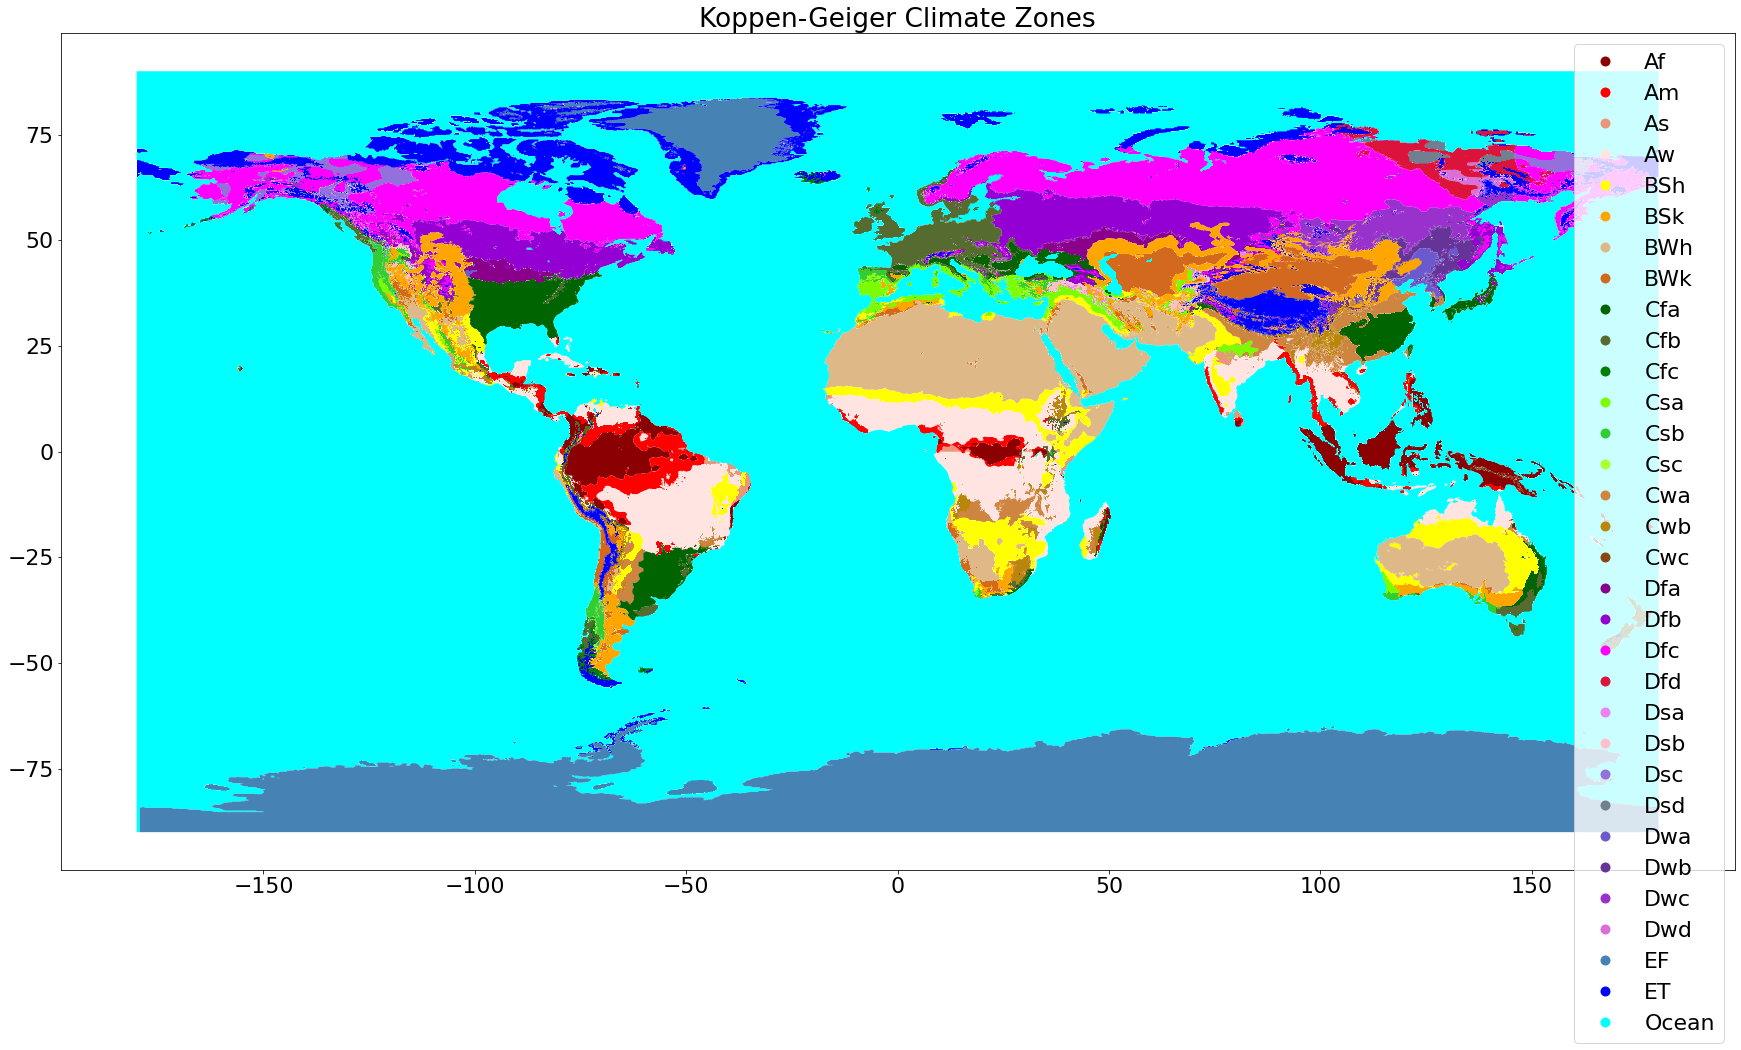

In [18]:
fig, ax = plt.subplots(figsize=(30, 20))
gdf_koppen.plot(ax=ax, column='Climate_Na', legend=True, cmap=cmap)

plt.rcParams.update({'font.size': 22})
ax.set_title('Koppen-Geiger Climate Zones')
plt.savefig('Koppen_Geiger.png')

### Plot including selection Sophie

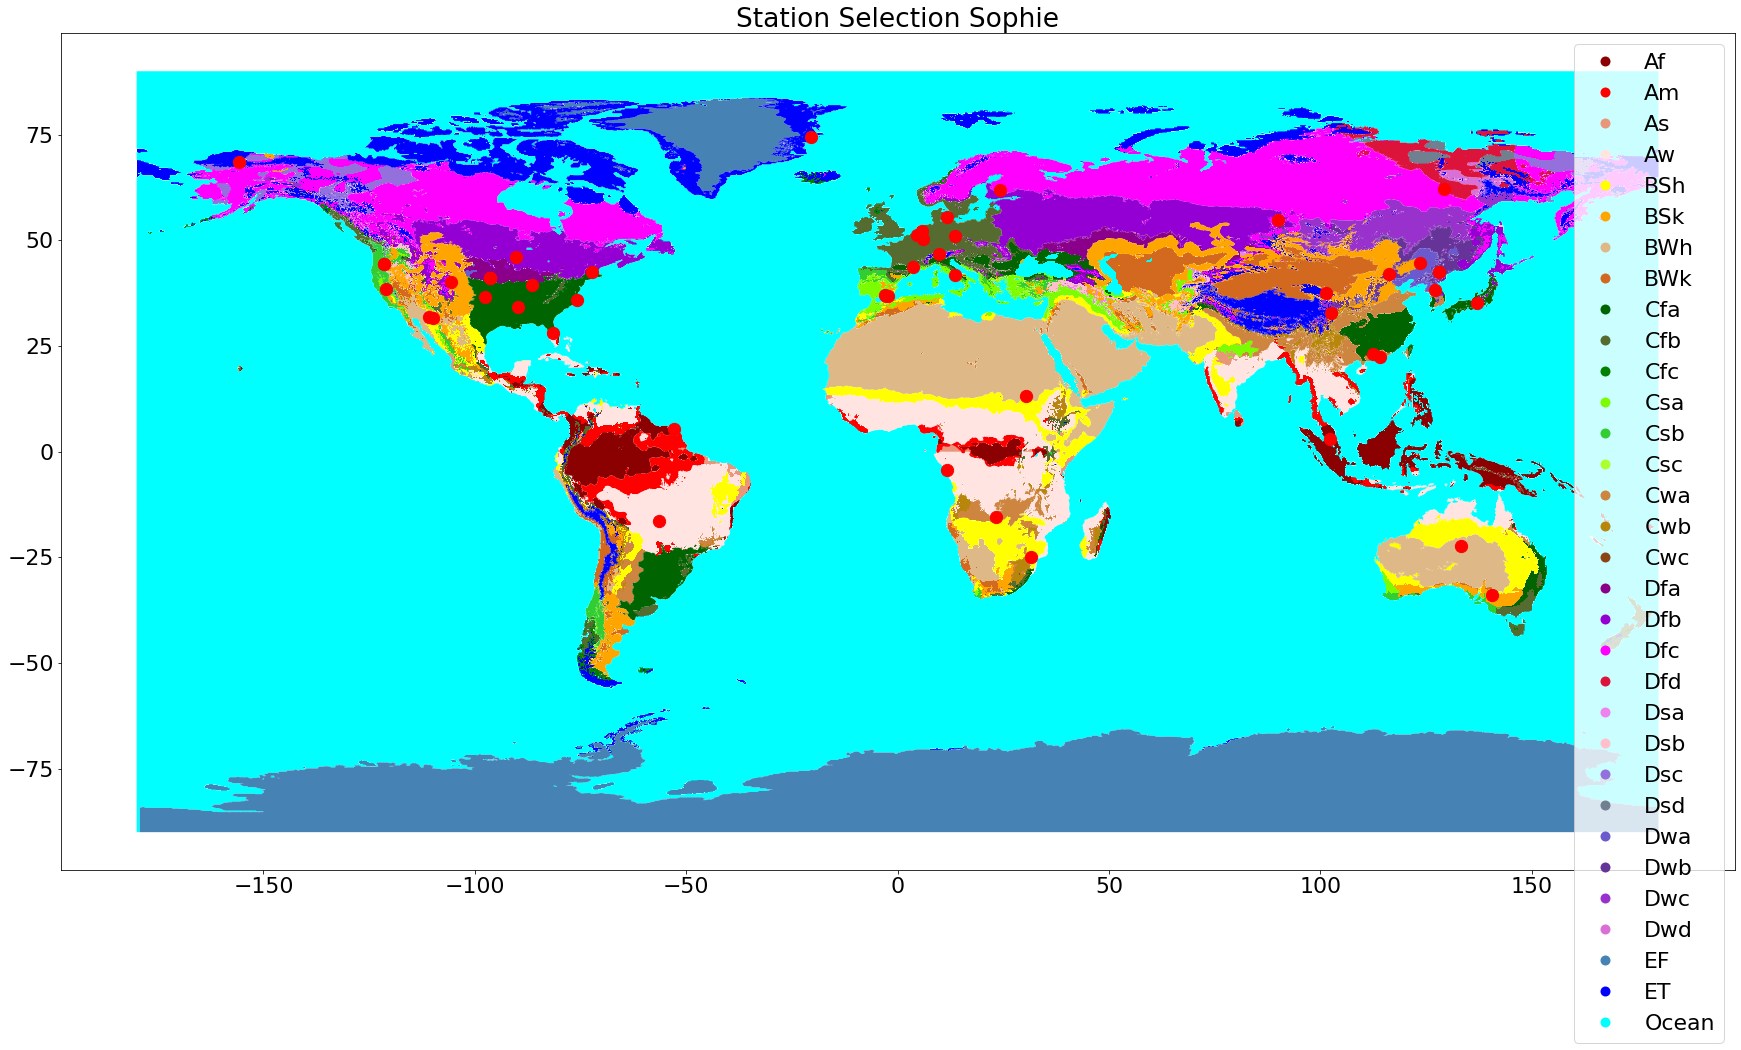

In [19]:
fig, ax = plt.subplots(figsize=(30, 20))
gdf_koppen.plot(ax=ax, column='Climate_Na', legend=True, cmap=cmap)
gdf_long.plot(ax=ax, color='red', markersize=150)

plt.rcParams.update({'font.size': 22})
ax.set_title('Station Selection Sophie')
plt.savefig('Koppen_Geiger_selection_Sophie.png')

### Plot including selection Sophie (red) modified Jerom (Yellow)

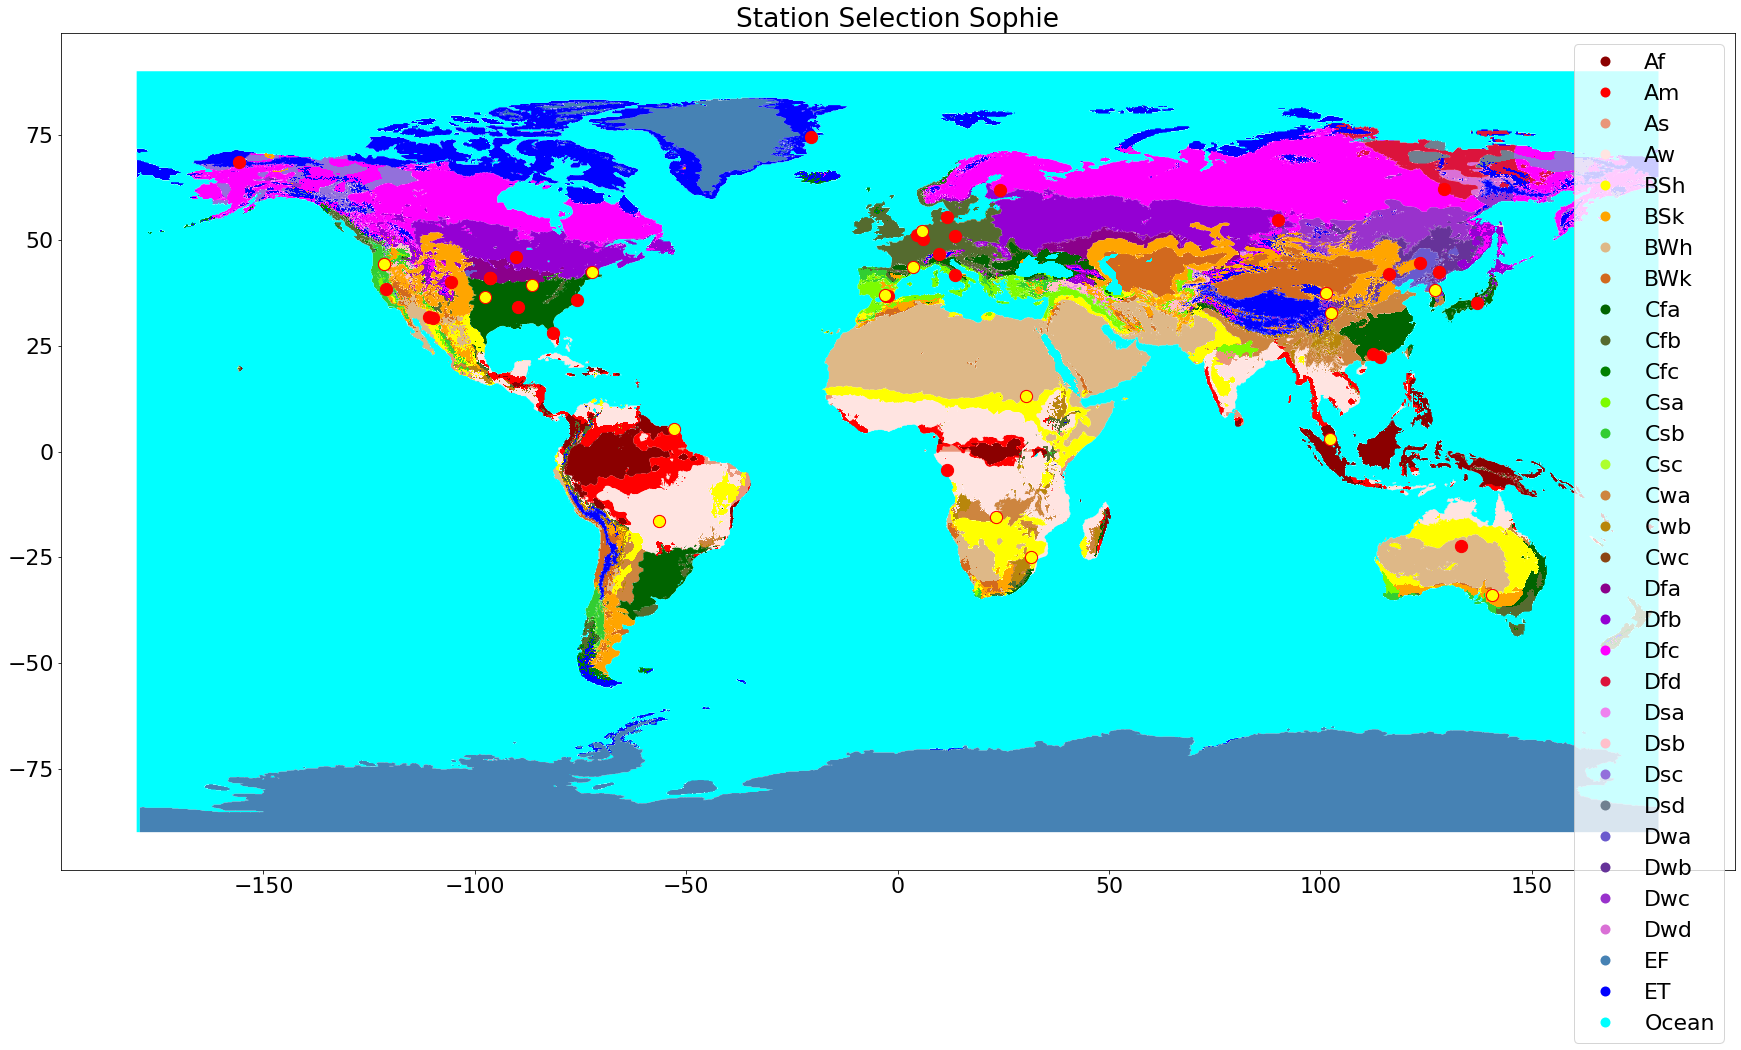

In [20]:
fig, ax = plt.subplots(figsize=(30, 20))
gdf_koppen.plot(ax=ax, column='Climate_Na', legend=True, cmap=cmap)
gdf_long.plot(ax=ax, color='red', markersize=150)
gdf_short.plot(ax=ax, color='yellow', markersize=100)

plt.rcParams.update({'font.size': 22})
ax.set_title('Station Selection Sophie')
plt.savefig('Koppen_Geiger_selection_Jerom.png')